In [1]:
import pandas as pd

In [2]:
# 讀入 csv 文字檔
csv_file = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.csv"
gapminder = pd.read_csv(csv_file)

In [3]:
print(type(gapminder))

<class 'pandas.core.frame.DataFrame'>


In [4]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
# 讀入 excel 試算表
xlsx_file = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.xlsx"
gapminder = pd.read_excel(xlsx_file)
print(type(gapminder))
gapminder.head()

<class 'pandas.core.frame.DataFrame'>


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### 查看資料的大小

In [6]:
gapminder.shape

(1704, 6)

### DataFrame 的變數資訊

In [7]:
gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [8]:
gapminder.columns[0]

'country'

### DataFrame 的列索引資訊

In [9]:
gapminder.index

RangeIndex(start=0, stop=1704, step=1)

In [10]:
gapminder.index[-1]

1703

### DataFrame 的詳細資訊

In [11]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### DataFrame 各數值變數的簡易敘述統計

In [12]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


dplyr 是R 做資料處理的重要package，其基本功能是六個能與 SQL 查詢語法相互呼應的函數，列舉如下：

1. filter() 函數：SQL 查詢中的 where 描述
2. select() 函數：SQL 查詢中的 select 描述
3. mutate() 函數：SQL 查詢中的衍生欄位描述
4. arrange() 函數：SQL 查詢中的 order by 描述
5. summarise() 函數：SQL 查詢中的聚合函數描述
6. group_by() 函數：SQL 查詢中的 group by 描述

我們可以用布林判斷條件的方式，在pandas 中做出類似的功能。

例如：選出滿足country是台灣的資料

In [13]:
gapminder[gapminder['country'] == 'Taiwan']

,country,continent,year,lifeExp,pop,gdpPercap
1500,Taiwan,Asia,1952,58.50,8550362,1206.947913
1501,Taiwan,Asia,1957,62.40,10164215,1507.861290
1502,Taiwan,Asia,1962,65.20,11918938,1822.879028
1503,Taiwan,Asia,1967,67.50,13648692,2643.858681
1504,Taiwan,Asia,1972,69.39,15226039,4062.523897
1505,Taiwan,Asia,1977,70.59,16785196,5596.519826
1506,Taiwan,Asia,1982,72.16,18501390,7426.354774
1507,Taiwan,Asia,1987,73.40,19757799,11054.561750
1508,Taiwan,Asia,1992,74.26,20686918,15215.657900
1509,Taiwan,Asia,1997,75.25,21628605,20206.820980


如果有多個條件，可以使用 | 或 & 符號連結，例如選出 2007 年的亞洲國家：

In [14]:
gapminder[(gapminder['year'] == 2007) & (gapminder['continent'] == 'Asia')]

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
95,Bahrain,Asia,2007,75.635,708573,29796.048340
107,Bangladesh,Asia,2007,64.062,150448339,1391.253792
227,Cambodia,Asia,2007,59.723,14131858,1713.778686
299,China,Asia,2007,72.961,1318683096,4959.114854
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.978670
707,India,Asia,2007,64.698,1110396331,2452.210407
719,Indonesia,Asia,2007,70.650,223547000,3540.651564
731,Iran,Asia,2007,70.964,69453570,11605.714490
743,Iraq,Asia,2007,59.545,27499638,4471.061906


用 list 標註變數名稱可以將變數從資料框中選出，實踐 select() 函數的功能，例如選出 country 與 continent 變數：

In [15]:
gapminder[['country', 'continent']]

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


如果只選一個變數且沒有以 list 標註，同樣能選出變數，但是型別會變為 Series：

In [16]:
country = gapminder['country']
print(type(country))

<class 'pandas.core.series.Series'>


In [17]:
country2 = gapminder[['country']]
print(type(country2))

<class 'pandas.core.frame.DataFrame'>


直接撰寫衍生公式並為變數命名即可實踐 mutate() 函數的功能，搭配 apply() 與 lambda 函數將公式應用到每一個觀測值，例如新增一個 country_abb 變數擷取原本 country 變數的前三個英文字母：

In [18]:
gapminder['country_abb'] = gapminder['country'].apply(lambda x: x[:3])

In [19]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,country_abb
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,Afg
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,Afg
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,Afg
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,Afg
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,Afg
...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,Zim
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,Zim
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,Zim
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,Zim


呼叫 DataFrame 不同的聚合函數針對欄位計算，實踐 summarise() 函數的功能，例如計算 2007 年全球人口總數：

In [20]:
gapminder[gapminder['year'] == 2007][['pop']].sum()

pop    6251013179
dtype: int64

In [21]:
gapminder[gapminder['year'] == 2007]

,country,continent,year,lifeExp,pop,gdpPercap,country_abb
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,Afg
23,Albania,Europe,2007,76.423,3600523,5937.029526,Alb
35,Algeria,Africa,2007,72.301,33333216,6223.367465,Alg
47,Angola,Africa,2007,42.731,12420476,4797.231267,Ang
59,Argentina,Americas,2007,75.320,40301927,12779.379640,Arg
...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,Vie
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,Wes
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,Yem
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,Zam


In [22]:
gapminder[gapminder['year'] == 2007][['pop']]

,pop
11,31889923
23,3600523
35,33333216
47,12420476
59,40301927
...,...
1655,85262356
1667,4018332
1679,22211743
1691,11746035


In [23]:
type(gapminder[gapminder['year'] == 2007][['pop']])

pandas.core.frame.DataFrame

或者計算 2007 年全球的平均壽命、平均財富：

In [24]:
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].mean()

lifeExp         67.007423
gdpPercap    11680.071820
dtype: float64

最後是呼叫 DataFrame 的 groupby 方法實踐 group_by() 函數的功能，例如計算 2007 年各洲人口總數：

In [25]:
gapminder[gapminder['year'] == 2007].groupby(by = 'continent')['pop'].sum()

continent
Africa       929539692
Americas     898871184
Asia        3811953827
Europe       586098529
Oceania       24549947
Name: pop, dtype: int64

或者計算 2007 年各洲平均壽命、平均財富：

In [26]:
gapminder[gapminder['year'] == 2007].groupby(by = 'continent')[['lifeExp', 'gdpPercap']].mean()

,lifeExp,gdpPercap
continent,,
Africa,54.806038,3089.032605
Americas,73.608120,11003.031625
Asia,70.728485,12473.026870
Europe,77.648600,25054.481636
Oceania,80.719500,29810.188275


## 資料視覺化

Python 視覺化的基石是 Matplotlib 套件的 pyplot，她的繪圖哲學是將圖形的元素，例如座標軸、線、點或者文字用不同的方法一一拼湊起來，優點是繪圖的彈性非常高，缺點則是對於初學者的門檻略高。為了解決這個問題，pandas 套件將 matplotlib.pyplot 的基礎圖形包裝起來成為一個方法，讓使用者只要呼叫 df.plot() 就能夠便利地繪圖，可以選擇的圖形種類相當豐富，只要指定 kind = 參數即可：

1. ‘line’ : 線圖（預設）
2. ‘bar’ : 垂直長條圖
3. ‘barh’ : 水平長條圖
4. ‘hist’ : 直方圖
5. ‘box’ : 盒鬚圖
6. ‘scatter’ : 散佈圖
7. ‘hexbin’ : hexbin plot
8. …etc.
在作圖之前我們載入 matplotlib.pyplot 與 seaborn，前者是繪圖的基礎套件，後者是讓圖形的樣式美觀：



In [27]:
!pip install seaborn

You should consider upgrading via the '/home/byronwai/.virtualenvs/jupyter-py3/bin/python -m pip install --upgrade pip' command.


In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 視覺化時間與數值：線圖

將臺灣資料篩選出來並繪製從 1952 年至 2007 年的人口變化：

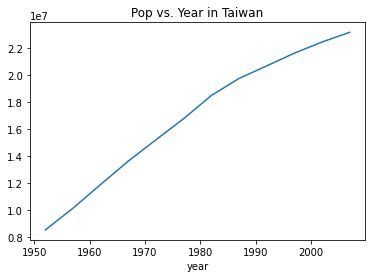

In [29]:
gapminder_twn = gapminder[gapminder['country'] == 'Taiwan']
gapminder_twn[['year', 'pop']].plot(kind = 'line', x = 'year', y = 'pop', title = 'Pop vs. Year in Taiwan', legend = False)
plt.show()

或者將中國、日本、南韓與臺灣資料篩選出來並繪製從 1952 年至 2007 年的平均壽命變化：



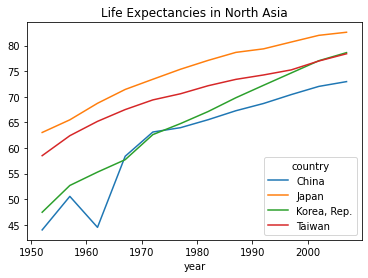

In [30]:
gapminder_northasia = gapminder.loc[gapminder['country'].isin(['China', 'Japan', 'Korea, Rep.', 'Taiwan'])]
gapminder_northasia_pivot = gapminder_northasia.pivot_table(values = 'lifeExp', columns = 'country', index = 'year')
gapminder_northasia_pivot.plot(title = 'Life Expectancies in North Asia')
plt.show()

### 視覺化數值的分佈：直方圖、盒鬚圖

將 2007 年資料篩選出來並以三個子圖（subplots）繪製人口數、平均壽命與人均所得的直方圖：



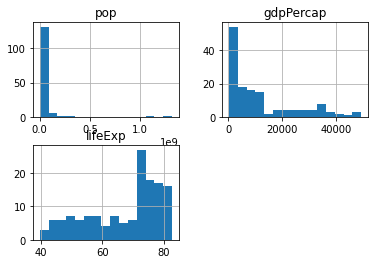

In [31]:
gapminder_2007 = gapminder[gapminder['year'] == 2007]
gapminder_2007[['pop', 'gdpPercap', 'lifeExp']].hist(bins = 15)
plt.show()

或者繪製人均所得的直方圖：

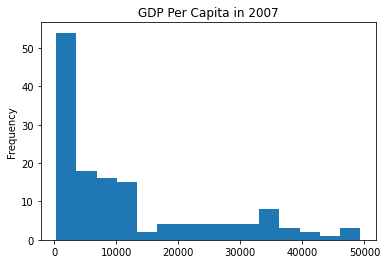

In [32]:
gapminder_2007[['gdpPercap']].plot(kind = 'hist', title = 'GDP Per Capita in 2007', legend = False, bins = 15)
plt.show()

或者將人均所得直方圖依照不同洲別以不同顏色繪製：

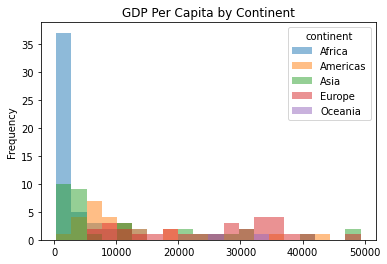

In [33]:
gapminder_continent_pivot = gapminder_2007.pivot_table(values = 'gdpPercap', columns = 'continent', index = 'country')
gapminder_continent_pivot.plot(kind = 'hist', alpha=0.5, bins = 20, title = 'GDP Per Capita by Continent')
plt.show()

或者依照不同洲別，將人均所得以盒鬚圖繪製：

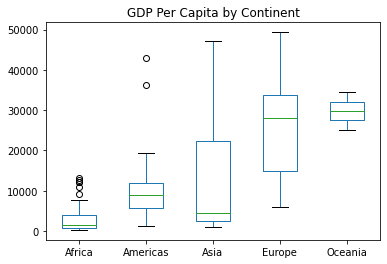

In [34]:
gapminder_continent_pivot.plot(kind = 'box', title = 'GDP Per Capita by Continent')
plt.show()

### 視覺化相關性：散佈圖、hexbin plot

繪製 2007 年各國人均所得與平均壽命的散佈圖：

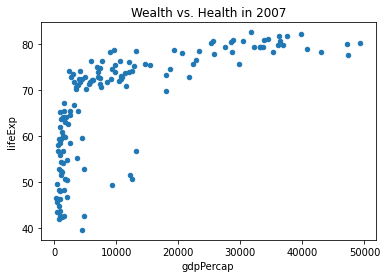

In [35]:
gapminder_2007.plot(kind = 'scatter', x = 'gdpPercap', y = 'lifeExp', title = 'Wealth vs. Health in 2007')
plt.show()

或改以 hexbin plot 呈現：



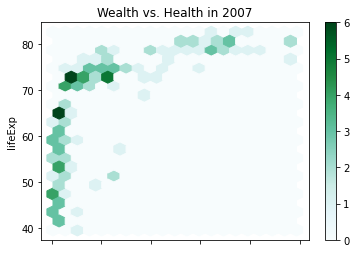

In [36]:
gapminder_2007.plot(kind = 'hexbin', x = 'gdpPercap', y = 'lifeExp', title = 'Wealth vs. Health in 2007', gridsize = 20)
plt.show()

### 視覺化排名：長條圖

繪製 2007 年各洲的人口總數：

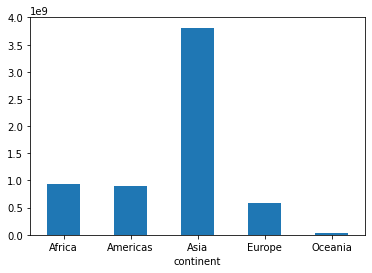

In [37]:
summarized_df = gapminder[gapminder['year'] == 2007].groupby(by = 'continent')['pop'].sum()
summarized_df.plot(kind = 'bar', rot = 0)
plt.show()

或者繪製 2007 年各洲平均壽命、平均財富：

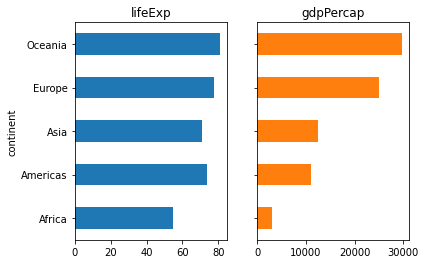

In [38]:
summarized_df = gapminder[gapminder['year'] == 2007].groupby(by = 'continent')[['lifeExp', 'gdpPercap']].mean()
summarized_df.plot(kind = 'barh', subplots = True, layout = (1, 2), sharex = False, sharey = True, legend = False)
plt.show()